In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from time import time
import timeit
import datetime
from datetime import datetime, timedelta
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import homogeneity_score, adjusted_mutual_info_score

In [ ]:
df_rfm = data = pd.read_csv('df05.csv')
df= pd.read_csv('df_m0.csv')

### Simulation

In [3]:
df_rfm

,CustomerID,Recency,Frequency,Monetary,RFM_Score,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,2.38,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,2.37,1
2,0000f46a3911fa3c0805444483337064,541,1,86.22,1.83,1
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,2.02,3
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,2.06,4
...,...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,2067.42,3.94,5
93392,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,2.12,3
93393,ffff371b4d645b6ecea244b27531430a,572,1,112.46,1.82,5
93394,ffff5962728ec6157033ef9805bacc48,123,1,133.69,2.36,5


In [4]:
data0 =df_data=df_rfm.sample(frac=0.15)
data0.shape

(14009, 6)

In [5]:
my_data = data0
X = my_data.drop(['CustomerID','RFM_Score'], axis = 1) 
X

,Recency,Frequency,Monetary,review_score
69985,395,1,50.09,5
75121,381,1,121.09,5
9238,74,2,263.64,5
40864,78,1,34.72,3
81207,300,1,36.75,5
...,...,...,...,...
66760,282,1,43.55,1
67257,354,1,168.23,3
60566,288,2,175.19,5
19761,377,1,358.72,5


In [6]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler().fit(X)
ada_scaled = scale.transform(X)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(ada_scaled)

PCA(n_components=3)

In [8]:
ada_scaled

array([[ 1.00914442, -0.30751667, -0.51081181,  0.71168644],
       [ 0.91735551, -0.30751667, -0.21950783,  0.71168644],
       [-1.09544403,  0.99085616,  0.3653567 ,  0.71168644],
       ...,
       [ 0.30761493,  0.99085616,  0.00245759,  0.71168644],
       [ 0.89113011, -0.30751667,  0.75545786,  0.71168644],
       [ 0.11092442, -0.30751667,  0.14880707,  0.71168644]])

In [9]:
df_ada = pd.DataFrame(ada_scaled)
df_ada.columns = ['Recency','Frequency','Monetary','review_score']

In [10]:
df_ada

,Recency,Frequency,Monetary,review_score
0,1.009144,-0.307517,-0.510812,0.711686
1,0.917356,-0.307517,-0.219508,0.711686
2,-1.095444,0.990856,0.365357,0.711686
3,-1.069219,-0.307517,-0.573873,-0.720993
4,0.386291,-0.307517,-0.565544,0.711686
...,...,...,...,...
14004,0.268277,-0.307517,-0.537645,-2.153672
14005,0.740334,-0.307517,-0.026098,-0.720993
14006,0.307615,0.990856,0.002458,0.711686
14007,0.891130,-0.307517,0.755458,0.711686


In [11]:
kmeans_model_pca = Pipeline([("preprocessing", StandardScaler()),
                             ("kmeans",KMeans(n_clusters = 4))])
kmeans_model_pca.fit(ada_scaled)

# Kmeans labels
pca_kmeans_labels = kmeans_model_pca.named_steps['kmeans'].labels_


In [12]:
df_ada['pca_kmeans_labels'] = pca_kmeans_labels
df_ada_clusters_pca = df_ada.groupby("pca_kmeans_labels").mean()
df_ada_clusters_pca.iloc[:,:-1]

,Recency,Frequency,Monetary
pca_kmeans_labels,,,
0,0.998082,-0.127516,-0.144399
1,-0.744639,-0.123544,-0.117999
2,0.030256,-0.092710,-0.092667
3,-0.008667,2.894980,2.972427


In [13]:
pca_kmeans_labels

array([0, 0, 1, ..., 0, 0, 1])

In [14]:
X_proj = pca.transform(ada_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3"])
X_proj[:4]

,PC1,PC2,PC3
0,-0.654871,0.208664,1.181963
1,-0.444901,0.144019,1.123491
2,0.975680,-1.276080,-0.196433
3,-0.541772,-0.246112,-1.296085


### Modelisation de base

In [15]:
modelKmean = KMeans(n_clusters=4, init="k-means++",random_state=42)
modelKmean.fit(ada_scaled)


KMeans(n_clusters=4, random_state=42)

In [16]:
y_pred= modelKmean.labels_

### Stabilistion du model à l'initialisation

In [38]:

def stab(model, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), model).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[1].inertia_]
    
    # Test differents metrics on pred labels
    clustering_metrics = [
        homogeneity_score,
        adjusted_rand_score,
        adjusted_mutual_info_score]
    results += [m(labels, estimator[1].labels_) for m in clustering_metrics]
    
    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [39]:
print("Scores de stabilité à l'initialisation")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    imodel = KMeans(n_clusters=4, n_init=1, init="k-means++")
    stab(model=imodel, name="Iter "+str(i), data=df_ada, labels=pca_kmeans_labels) 
                 

print(53 * '_')

Scores de stabilité à l'initialisation
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.055s	27464	1.000	1.000	1.000
Iter 1   	0.008s	27464	1.000	1.000	1.000
Iter 2   	0.016s	27464	1.000	1.000	1.000
Iter 3   	0.025s	36031	0.659	0.669	0.769
Iter 4   	0.028s	27464	1.000	1.000	1.000
Iter 5   	0.037s	27464	1.000	1.000	1.000
Iter 6   	0.020s	27464	1.000	1.000	1.000
Iter 7   	0.028s	27464	1.000	1.000	1.000
Iter 8   	0.020s	27464	1.000	1.000	1.000
Iter 9   	0.012s	27464	1.000	1.000	1.000
_____________________________________________________


In [19]:
df_01 = pd.read_csv('data_init.csv', index_col=0)
df_01

,Recency,Frequency,Monetary,RFM_Score,mean_review_score
CustomerID,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,2.38,4
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,2.37,1
0000f46a3911fa3c0805444483337064,541,1,86.22,1.83,1
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,2.02,3
0004aac84e0df4da2b147fca70cf8255,292,1,196.89,2.06,4
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,2,2067.42,3.94,5
fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,2.12,3
ffff371b4d645b6ecea244b27531430a,572,1,112.46,1.82,5


In [40]:
df_rfm= pd.read_csv('df05.csv', index_col=0)

In [41]:
df_rfm=df_rfm.sample(frac=0.15)
df_rfm.shape

(14009, 5)

In [42]:
df_rfm 

,Recency,Frequency,Monetary,RFM_Score,review_score
CustomerID,,,,,
e5ef105b0d7651ba4159de0ca6c2aeab,53,1,162.34,2.47,5
f23546f84d761adfb501d26135e28cf2,282,1,310.81,2.08,5
73f90b219c69253bddd6d6111783f47b,195,1,38.09,2.23,5
5ac38ef6460160424c73cac26a8bc274,136,1,423.47,2.33,5
e6265c2122da57d6bb3df820dec0d905,339,1,276.57,2.01,5
...,...,...,...,...,...
15e0f5e3fd10fb235acab6d62a9cf84a,480,1,60.85,1.87,5
c53d90ab068a7fde8fb74003248e1ebc,282,1,194.06,2.08,5
35a5139d64a17f2d5336aabace88cf87,368,1,196.37,1.97,1


In [43]:
df_comm = pd.read_csv('olist_orders_dataset.csv')
df_comm

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [44]:
df_com_dat = df_comm.loc[df_comm['order_status'] == "delivered",
                    "order_purchase_timestamp"]
df_com_dat=pd.to_datetime(df_com_dat)
time_delta = int((df_com_dat.max() - df_com_dat.min())/np.timedelta64(1,'M'))
print("L'étendu des dates de commandes est égale à  {} mois.".format(time_delta))

L'étendu des dates de commandes est égale à  23 mois.


Pour déterminer le moment où les clients changent de cluster, nous allons itérer le K-Means sur toute la période avec des deltas de 2 mois et calculer le score ARI, en prenant garde à bien comparer les mêmes clients (ceux des 12 mois initiaux).

Ici le déroulé est créé directement dans le notebook pour explication, en production, toutes ses opérations seront regroupées dans une classe Python pour automatiser le processus.

In [45]:
kmeans_init = Pipeline([("preprocessor", StandardScaler()),
                        ("kmeans", KMeans(4, random_state=42))])
kmeans_init.fit(ada_scaled )
init_labels = kmeans_init.named_steps['kmeans'].labels_
init_labels

array([1, 1, 2, ..., 1, 1, 2])

In [46]:
ari_score = []
for p in np.arange(2,(time_delta-12),2):
    # Create dataset for period
    data_period = df_01
    
    # Filter on initial customer client
    data_period = data_period[data_period.index.isin(df_rfm.index)]
    
    # K-Means
    kmeans_p = Pipeline([("preprocessor", StandardScaler()),
                         ("kmeans", KMeans(4, random_state=42))])
    kmeans_p.fit(data_period)
    p_labels = kmeans_p.named_steps['kmeans'].labels_
    
    # Calculate ARI score
    ari_p = adjusted_rand_score(init_labels, kmeans_p[1].labels_)
    ari_score.append([p,ari_p])

In [47]:
ari_p

0.0010467379244395965

In [48]:
ari_score

[[2, 0.0010467379244395965],
 [4, 0.0010467379244395965],
 [6, 0.0010467379244395965],
 [8, 0.0010467379244395965],
 [10, 0.0010467379244395965]]

In [49]:
ari_score = pd.DataFrame(ari_score, columns=["periode", "ARI"])
ari_score

,periode,ARI
0,2,0.001047
1,4,0.001047
2,6,0.001047
3,8,0.001047
4,10,0.001047


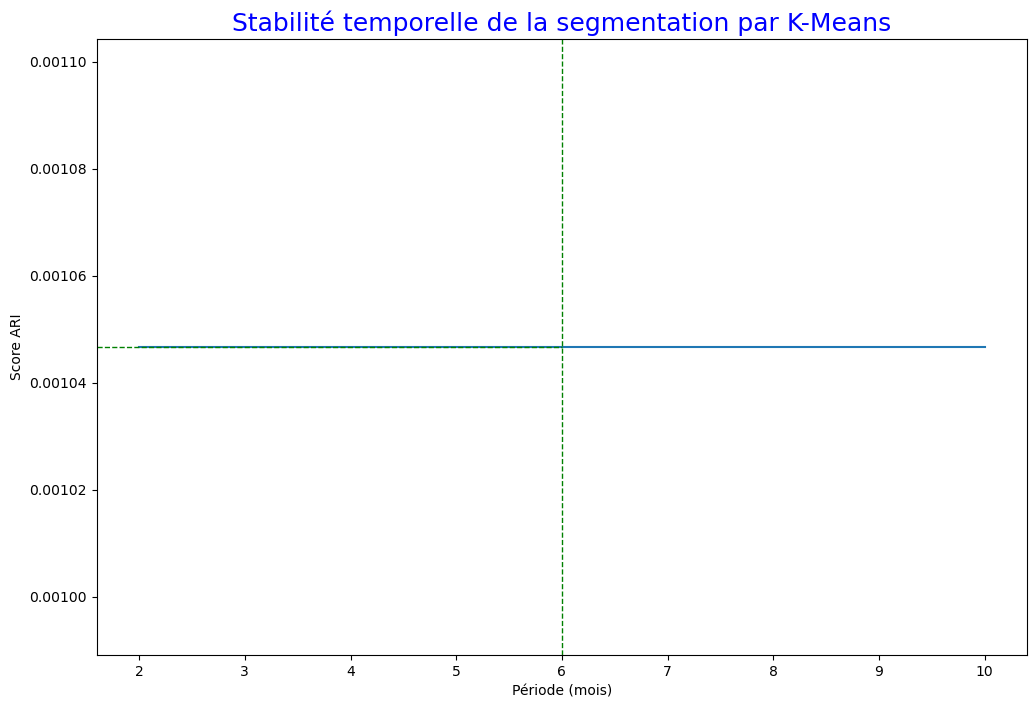

In [50]:


# plot ARI Score
fig = plt.figure(figsize=(12,8))
sns.lineplot(data=ari_score, x="periode", y="ARI")
plt.axhline(y=ari_score.iloc[2][1], linestyle="--", 
            color="green",
            xmax=0.5,
            linewidth=1)
plt.axvline(x=ari_score.iloc[2][0], linestyle="--", 
            color="green",
            ymax=1.1-(ari_score.iloc[2][1]),
            linewidth=1)
plt.xlabel("Période (mois)")
plt.ylabel("Score ARI")
plt.title("Stabilité temporelle de la segmentation par K-Means",
          fontsize=18,
          color="b")
plt.show()